In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     337 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                328 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [46]:
###QUESTION 1####
columns = df.columns
for col in columns:
    missCount = df[col].isnull().sum()
    # print(len(missCount))
    print(missCount)
    if col =='sex':
        df[col].fillna({col:'unknown'},inplace = True)
    else:
        df = df.dropna()
print(df)

0
0
0
0
0
0
0
       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g      sex  
0        

We can't remove rows without gender as the person may not be willing to disclose it,so in place of it, we can place an unknown.In all other numericals, unless we have more information about the dataframe, we can't place another value like mean/median, so records with NULL in numerical columns will be removed.

In [47]:
###QUESTION 2###
df['species'].unique()
Gentoo_penguins = df[df['species']=='Gentoo']
mass = Gentoo_penguins['body_mass_g'].mean()
mass

5159.151785714285

In [48]:
###QUESTION 3
all_species = df['species'].unique()
for species in all_species:
    one_penguin = df[df['species']==species]
    skewness = one_penguin['bill_length_mm'].skew()
    kurtosis = one_penguin['bill_length_mm'].kurt()
    # print(skewness)
    print(f"Skewness of {species} = {skewness} and kurtosis = {kurtosis}")
    

Skewness of Adelie = 0.14940556826470702 and kurtosis = -0.10941854643790405
Skewness of Gentoo = 0.651099043860485 and kurtosis = 1.2709243407876167
Skewness of Chinstrap = -0.09164218184937144 and kurtosis = 0.06240849078268518


Skewness is used to find the assymetricity of the data
High skewness would usually indicate the data is more distributed on the right side of the median
Low skewness would mean on the left

Kurtosis would be used to determine the "height" of the distribution
If high, the data is more concentrated at the centre of the distribution
If low, the data is more spread out and flatter.
Kurtosis can be used to find whether there are any outliers in the data.

There could be some outliers in gentoo penguins on the right side(values larger than the normal distribution).

outliers in  bill_length_mm


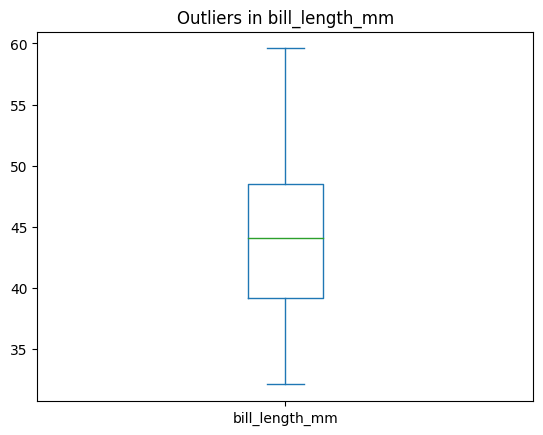

outliers in  bill_depth_mm


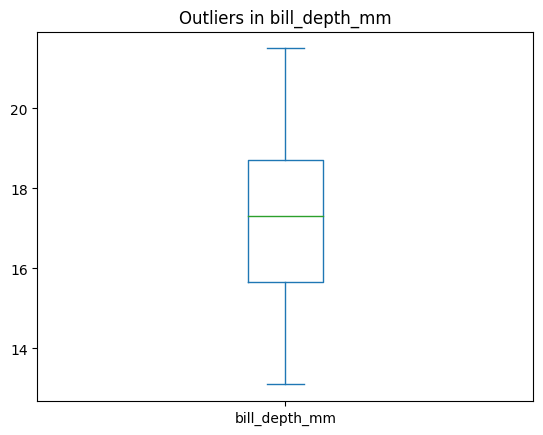

outliers in  flipper_length_mm


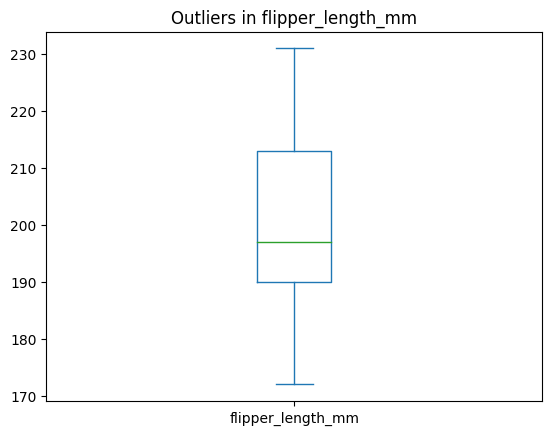

outliers in  body_mass_g


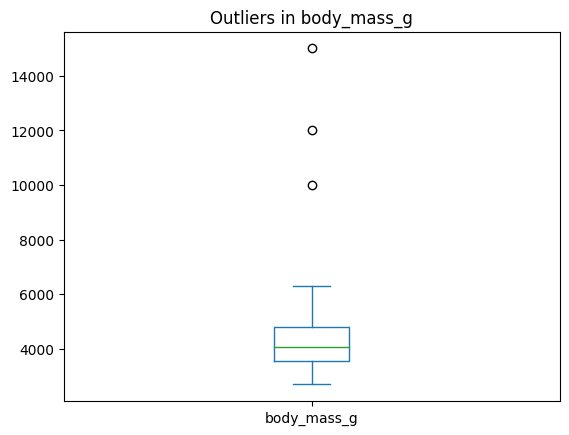

In [49]:
###QUESTION 4####
# df['bill_length_mm'].dtype
# df.info()
for cols in columns:
    if df[cols].dtype != 'object':
        Q1 = df[cols].quantile(0.25)
        Q3 = df[cols].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q1 + 1.5*IQR
        # print(lower_bound,upper_bound,cols,Q1,Q3)
        outliers = df[(df[cols] < lower_bound) | (df[cols] > upper_bound)]
        # print(outliers)
        if not outliers.empty:
            print("outliers in ",cols)
            plt.figure()
            df[cols].plot(kind = 'box')
            plt.title(f"Outliers in {cols}")
            plt.show()
        # print(cols)

IQR is famously used to detect outliers, as it splits the distribuion into percentile wise and gives us the outliers needed according to the above formula.As we can see, there are outliers in all 4 numerical columns.

In [50]:
###QUESTION 5###
from sklearn.decomposition import PCA

# pca = PCA()
# pca.fit(df['bill_depth_mm'])
# print(pca.explained_variance_ratio_)
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
norm_df = df.copy()
columns = norm_df.columns
for cols in columns:
    if norm_df[cols].dtype != 'object':
        norm_df[cols] = (norm_df[cols] - norm_df[cols].mean())/norm_df[cols].std()
# print(norm_df)
data = norm_df[['bill_depth_mm','bill_length_mm','flipper_length_mm','body_mass_g']]
data
pca = PCA()
pca.fit(data)
vars = pca.explained_variance_ratio_
print(vars)
print("One feature's variance is very low")
pca2 = PCA(n_components=3)
new_data = pca2.fit_transform(data)
print("The transformed data to 3 features is :-")
print(new_data)

[0.61557234 0.19748104 0.13393102 0.0530156 ]
One feature's variance is very low
The transformed data to 3 features is :-
[[-1.80295971e+00  1.31482210e-01  3.90038774e-01]
 [-1.25850866e+00 -3.81239617e-01  2.64627663e-01]
 [-1.17242851e+00 -1.92681427e-01 -2.61652677e-01]
 [-1.76524281e+00  6.74366446e-02  3.40180253e-01]
 [-1.85085080e+00  9.05395513e-01  3.18649996e-01]
 [-1.68392248e+00 -2.91961186e-01  2.71010339e-01]
 [-9.91873549e-01  6.75865209e-01  9.56609726e-01]
 [-1.58835508e+00 -2.63266284e-01 -2.77462247e-01]
 [-1.93287130e+00  1.12166285e+00  5.21100895e-01]
 [-1.71002653e+00  8.15270094e-01  1.28518194e+00]
 [-1.68603845e+00 -5.00169366e-01  5.21185873e-01]
 [-1.43971799e+00  1.21491066e-01  1.00209516e-01]
 [-9.23957787e-01  1.40332060e+00  5.37283760e-01]
 [-2.21311700e+00 -5.27314199e-01  5.21271388e-01]
 [-1.04038496e+00  2.01006327e+00  3.92502865e-02]
 [-2.28115114e+00 -2.12178250e-01  3.17403699e-01]
 [-2.03435102e+00 -2.70714490e-02  4.35466272e-01]
 [-1.832510

Number of dimensions can be reduced as one of the features(body_mass_g) has very low eigen value/variance.The dimensions can be reduced to 2/3

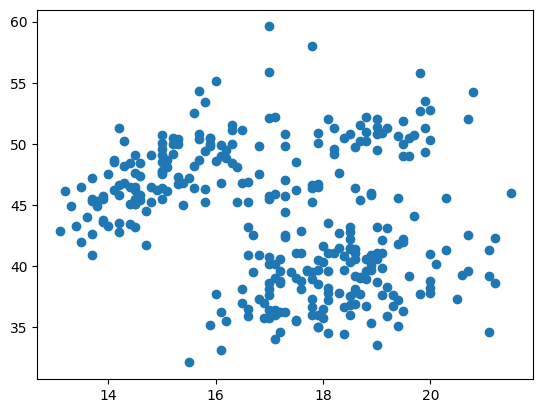

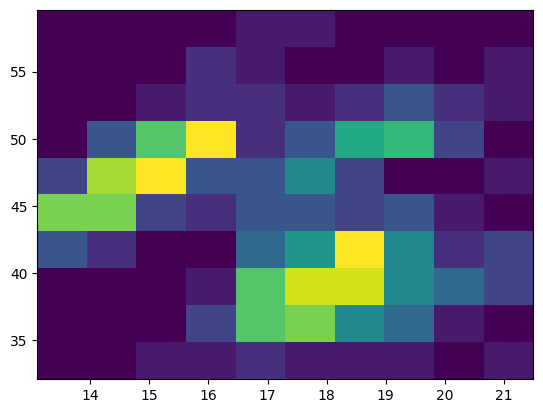

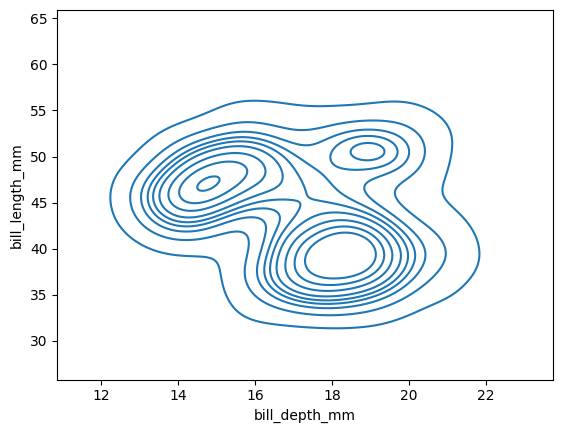

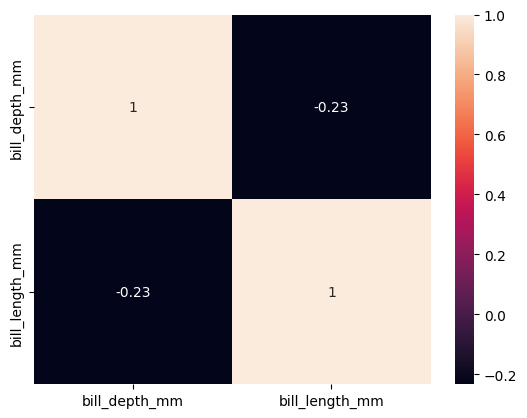

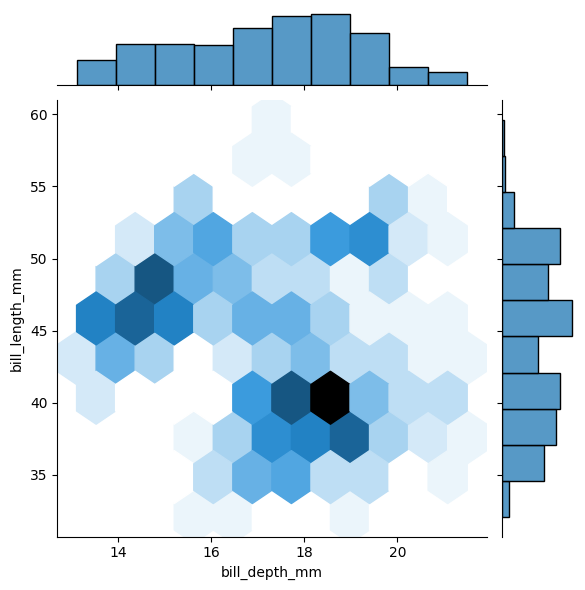

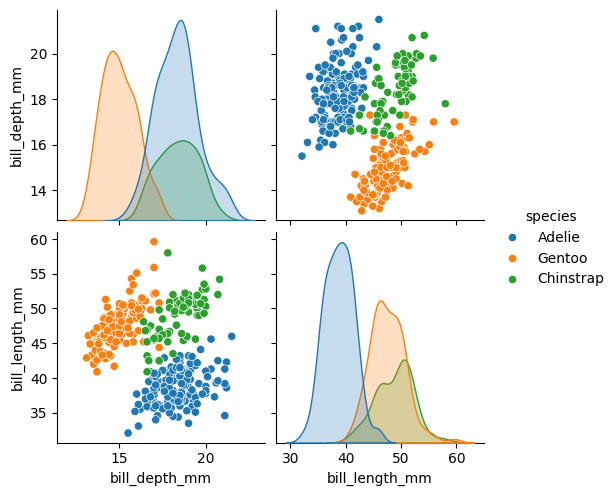

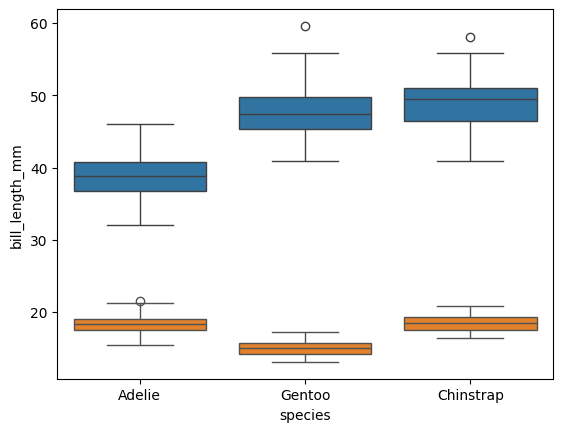

In [51]:
###QUESTION 6###
import seaborn as sns

bill_length = df['bill_length_mm']
bill_depth = df['bill_depth_mm']
# plt.figure(figsize = (12,10))
plt.plot()
plt.scatter(bill_depth,bill_length)
# pl
plt.show()
plt.plot()
plt.hist2d(bill_depth,bill_length)
plt.show()

plt.plot()
sns.kdeplot(x= bill_depth, y= bill_length)
plt.show()

plt.plot()
sns.heatmap(df[['bill_depth_mm','bill_length_mm']].corr(),annot = True)
# plt.show()
# sns.violinplot()
plt.plot()
sns.jointplot(x = bill_depth, y = bill_length, kind='hex')
plt.show()
# plt.plot()
sns.pairplot(data=df,hue = 'species',vars = ['bill_depth_mm','bill_length_mm'])
plt.show()
plt.plot()
sns.boxplot(x = df['species'],y = bill_length)
sns.boxplot(x = df['species'],y = bill_depth)
plt.show()

In [52]:
###QUESTION 7###
max_flippers  = df.groupby(['species','island'])['flipper_length_mm'].max()
print("All combinations of species and island")
print(max_flippers)
for island in df['island'].unique():
    island_data = df[df['island']==island]
    max_flipper_data = island_data.loc[island_data['flipper_length_mm'].idxmax(),'species']
    print(f"In island {island}:-{max_flipper_data} has max_flipper length")

All combinations of species and island
species    island   
Adelie     Biscoe       203.0
           Dream        208.0
           Torgersen    202.0
Chinstrap  Dream        212.0
Gentoo     Biscoe       231.0
Name: flipper_length_mm, dtype: float64
In island Torgersen:-Adelie has max_flipper length
In island Biscoe:-Gentoo has max_flipper length
In island Dream:-Chinstrap has max_flipper length


In [53]:
###QUESTION 8###
df_norm = df.copy()
columns = df.columns
for cols in columns:
    if df[cols].dtype != 'object':
        df_norm[cols] = (df[cols] - df[cols].mean())/df[cols].std()
print(df_norm)

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen       -0.871763       0.767153          -1.413450   
1       Adelie  Torgersen       -0.799069       0.104612          -1.054475   
2       Adelie  Torgersen       -0.653681       0.410400          -0.408320   
4       Adelie  Torgersen       -1.307925       1.072941          -0.551910   
5       Adelie  Torgersen       -0.835416       1.735482          -0.767295   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream        2.163203       1.327764           0.453220   
340  Chinstrap      Dream       -0.072131       0.461365           0.094245   
341  Chinstrap      Dream        1.036449       0.512329          -0.551910   
342  Chinstrap      Dream        1.254530       0.920047           0.668605   
343  Chinstrap      Dream        1.145490       0.767153          -0.192935   

     body_mass_g      sex  
0      -0.458802     ma

In [14]:
columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')